In [1]:
from matplotlib import pyplot as plt   
import cv2 as cv                      
from PIL import Image                 
import numpy as np                    
from pylab import rcParams            
rcParams['figure.figsize']=(10,10)    #Set the enlargement size

In [2]:
#Read the image from the same folder which contains this file
img=cv.imread('../images/solidWhiteRight.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

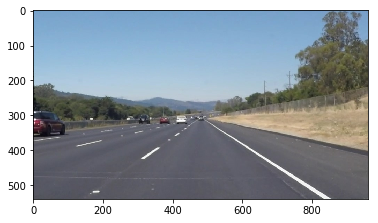

In [3]:
plt.imshow(img)

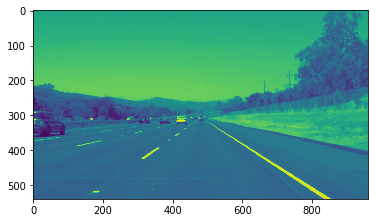

In [4]:
#Convert the image to the GRAY Scale Format because all OpenCV operatins are worked on GRAY Format
img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(img_gray)

## Gaussian Blur

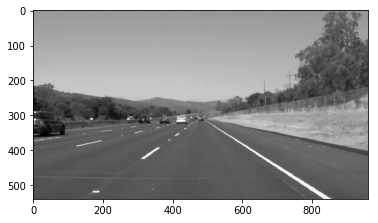

In [5]:
# Apply Gaussiab Blur Algo-->   5X5 is a Gaussian Filter
img_blur=cv.GaussianBlur(img_gray,(5,5),0)    
plt.imshow(img_blur,cmap="gray")             

## Canny Edge Detection

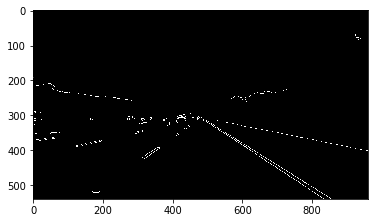

In [6]:
# Apply Canny Edge Detection Algo-->
img_canny=cv.Canny(img_blur,120,240)  
plt.imshow(img_canny,cmap="gray")     

In [7]:
# points 

In [8]:
# plt.imshow(cv.fillPoly(mask,points,(255,255,255)),cmap='gray')

## Masking the require area of img_canny

In [9]:
# It is a fxn which returns the coordinates of the requied region
def get_vertices(img_canny):
    rows, cols = img_canny.shape[:2]
    bottom_left = [cols*0.1 , rows*0.95]
    top_left = [cols*0.45,rows*0.6]
    bottom_right = [cols*0.9,rows*0.95]
    top_right = [cols*0.55,rows*0.6]
    
    ver = np.array([[bottom_left,top_left,top_right,bottom_right]],dtype=np.int32)
    return ver

In [10]:
# Diff B/W 1- r,c=img_canny.shape   & 2- r,c=img_canny.shape[:2]
r,c=img_canny.shape
print(r,c)

540 960


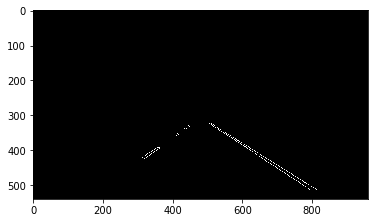

In [11]:
# Creating a mask of size img_canny
mask=np.zeros_like(img_canny)
# Get the coordinates of the region where the we want to detect  the lines in given image 
points=get_vertices(img)   
cv.fillPoly(mask,points,(255,255,255)) 
com=cv.bitwise_and(img_canny,mask)   
plt.imshow(com,cmap='gray')         

## Hough Lines Algo

In [12]:
lines=cv.HoughLinesP(com,                  
              rho=6,     
              theta=np.pi/60,
              threshold=140,   # Shows the lines which are having color value greater than 140  
              lines=np.array([]),
              minLineLength=40,
              maxLineGap=5
              )

In [13]:
p=lines
p

array([[[505, 324, 738, 476]],

       [[721, 455, 805, 509]],

       [[570, 362, 617, 390]],

       [[539, 343, 593, 375]],

       [[310, 422, 357, 392]],

       [[764, 482, 812, 513]]], dtype=int32)

In [14]:
lines[0][0] # here we get a value embeded into another list

array([505, 324, 738, 476], dtype=int32)

In [15]:
# reshape the lines list into 2D form from 3D form
lines=lines.reshape(-1,4)
lines.shape

(6, 4)

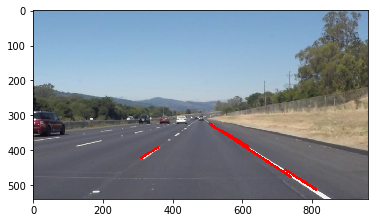

In [16]:
dg=img.copy()
for l in lines:
    x1,y1,x2,y2=l
    cv.line(dg,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(dg)

In [17]:
# this process is used for the video not necessary for the image because in video we want a general line so 
# Slope
slope=[]
x1,y1,x2,y2=lines[0]
slope1=(y2-y1)/(x2-x1)
slope.append(slope1)
x1,y1,x2,y2=lines[1]
slope2=(y2-y1)/(x2-x1)
slope.append(slope2)
x1,y1,x2,y2=lines[3]
slope3=(y2-y1)/(x2-x1)
slope.append(slope3)
x1,y1,x2,y2=lines[4]
slope4=(y2-y1)/(x2-x1)
slope.append(slope4)
x1,y1,x2,y2=lines[5]
slope5=(y2-y1)/(x2-x1)
slope.append(slope5)
print(slope)
leftlineslope=max(slope)
print(slope.index(leftlineslope))    
print(leftlineslope)
xx1,yy1,xx2,yy2=lines[slope.index(leftlineslope)]
print(xx1,yy1,xx2,yy2)

[0.6523605150214592, 0.6428571428571429, 0.5925925925925926, -0.6382978723404256, 0.6458333333333334]
0
0.6523605150214592
505 324 738 476


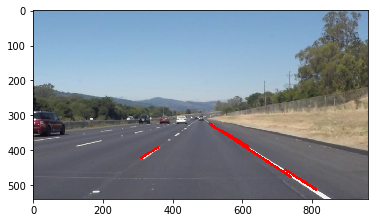

In [18]:
# it comes from the matrix of 3 X 3
img_test=img.copy()
for i in range(len(p)):
    x1,y1,x2,y2=p[i][0]
    cv.line(img_test,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(img_test)    


In [19]:
len(p)

6

In [30]:
get_vertices(img_canny)

array([[[ 96, 513],
        [432, 324],
        [528, 324],
        [864, 513]]], dtype=int32)